# CLASSIFICATION PROBLEM
 
In the previious section we talked about regression which deals with quatitative target variable answering
questions such as how much? or how many?. Regression problems include predicting the price of a house, the age of students and  the salary of an employee. 


$\textbf{In practice, we are more often interested in making categorical assignments: asking not how much? but which one (boy or girl)?}$. We consider a problem to be a classification problem when dealing with qualitative (categorical) target variable with the aim of assigning an input described by vector x to one of the n discrete categories (class) $C_{i}$  where $i = 1,2 \cdots,n$.


A classifier is a map $f(x) \rightarrow C_{i}$


There are numerous classification methods that can be used to predict categorical outcomes, including logistic regression,
support vector machines (SVM) ,decision trees and neural networks

# Logistic regression


The simplest classification problems involves only two classes which are usually lablled $\textbf{1}$for positive ($y=1|x$) and  $\textbf{O}$ for negatice class ($y=0|x$). Classification problems which involving only two categories are often called $\textbf{binary classification}$.


$\textbf{Logistic regression}$ is a probabilistic binary classifier which estimates, for each data point, the conditional probability that it belongs to one of the class.

This can be used to classify an observation into one of two classes (like ‘positive sentiment’ and ‘negative sentiment’, perished and survived, yes and no), from a set of continuous or categorical predictor variables. By choosing a threshold value, we classified output with probability greater than the threshold as one class usually the class labelled $\textbf{1}$ and values below the threshold as belonging to the other class labeled $\textbf{0}$. 

Recall from linear regression
$$\hat y= w^{T}x+b $$

here we are interested in asking the question "what is the probability that given an input vector x the predicted class will be a positive class" so instead of outputting values from the linear model we will modify the output by running the linear function through a sigmoid activation function $\sigma$ to output values with the range of [1,2]

$\hat y$ is then defined to be
$$ \hat{y} =\sigma(\boldsymbol{w}^T \boldsymbol{x} + b). $$
where
$$\boldsymbol{\sigma(z)}=\frac{1}{1+\exp(-z)} $$ and  z is linear function consisting of the input data and their associated
weights and biases. Thus
 $$z=\sum_{i=1}^{n}W_{i}^{T}X_{i} +b_{i}$$






Logistic regression classifies an input by learning from a training set. The model uses the learned weights and biases from the training data, to make a classification on newly unseen but similar instance or example. Each weight $w_{i}$ is a real number, and is associated with one of the input features $x_{i}$. 

$\bullet$We can generalize linear regression to Binary classification by replacing the Gaussian distribution for y with a Bernoulli distribution since the response is binary, $y \in \{0,1 \}$. where


$$ P(y|x,w)=Ber(y|\mu(x)) $$ where $\mu(x)=E[y|x]=P(y=1|X)$
$$\hat y=\mu(x)=\frac{1}{1+\exp(-z)} $$

where x is an input data ,$p(y = 1|x)$ is the probability that the input data belong to class 1 and $p(y = 0|x)=1-p(y = 1|x)$  belonging to the class labelled $0$




The function has a lower bound of zero and an upper bound of 1 and hence the function output values within the
range of $[0,1]$. Logistic sigmoid function is defined as


Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$
the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$



In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
m= nn.Sigmoid()
inputs = torch.randn(3)
m(inputs)


tensor([0.7311, 0.6261, 0.5433])

In [11]:
def sigmoid(z):
    return 1/(1+torch.exp(-z))
sigmoid(inputs)

tensor([0.7311, 0.6261, 0.5433])

In [12]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


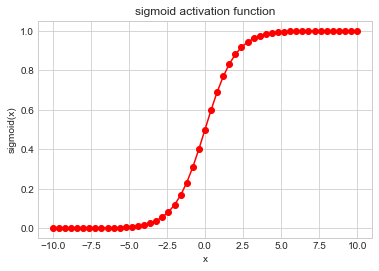

In [13]:
with plt.style.context('seaborn-whitegrid'):
    x = torch.range(-10,10,0.4)
    y=sigmoid(x)
    plt.plot(x.data.numpy(),y.data.numpy(),'r-o')
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.title('sigmoid activation function')
    plt.show()

# LOSS FUNCTION
The loss function measures how close the classifier output $\hat y$ is to the correct output y

We want to train our model such that it learned parameters (weights and biases) maximizes the probability of the correct 
label prediction $p(y|x)$.
Since only two discrete outcomes are invovled, this is a Bernoulli distribution, Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$ the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}} $$


when we take the log on both side it becomes

$$logP(y|x,w)=log ( \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$
$$logP(y|x,w)=y_{i}log \hat y + (1-y_{i})log(1 -\hat y) $$


which is a log likelihood function that should be maximized. In order to turn this
into loss function that need to be minimized we negate it which then becomes a minimization problem

$$-logP(y|x,w)=-[y_{i}log \hat y + (1-y_{i})log(1 -\hat y)] $$


We defined error to be the mean of the errors and hence the binary crossentropy error is defined to be
$$ loss=E(y, \hat y)=-InP(y|x,w)=\frac{-1}{n} \sum_{i=1}^{n}( y_{i} \log \hat{y}_{i} + (1-y_{i}) \log (1- \hat{y}_{i}))$$
 

In [14]:
target = torch.empty(3).random_(2)
loss=nn.BCELoss()
output = loss(m(inputs), target)
output

tensor(1.0270)

In [15]:
def BCE(y_hat,y):
    los=-(y*torch.log(y_hat) + (1-y)*torch.log(1-y_hat))
    return torch.mean(los)
BCE(sigmoid(inputs),target)

tensor(1.0270)

# GRADIENT DESCENT AND BACKPROPAGATION

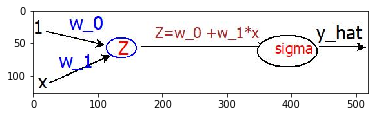

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
back=plt.imread('sigmoid.jpeg')
plt.imshow(back)
plt.show()

from the diagram above let 
$$  Z=w_{0} +w_{1}x $$

$$ \hat y=\sigma(Z)=\frac{1}{1 + \exp (-Z) } $$

$$ \frac{-1}{n} \sum_{i=1}^{n}( y_{i} \log \hat{y}_{i} + (1-y_{i}) \log (1- \hat{y}_{i})) $$

According to the chain rule, the error derivative for w1 will be

$$ \frac{\partial \epsilon }{\partial w_{1}}=\frac{\partial \epsilon }{\partial \hat y} \frac{\partial \hat y }{\partial Z }\frac{\partial Z }{\partial w_{1}}$$

# NOTE
from

# Quotient Rule
If the two functions f(x) and g(x) are differentiable (i.e. the derivative exist) then the quotient is
differentiable and,
$$ (\frac{f}{g})' =\frac{f'g-g'f}{g^{2}} $$

$\frac{d}{dz}  exp(z) =z'exp(z)=exp(z) $ because $z'=1$,      $\frac{d}{dz}  exp(-z) =-exp(z) $

 $$\sigma^{'}(z)= \frac{0-(-exp(-z))}{(1 + exp(-z))^{2}}= \frac{exp(-z))}{(1 + exp(-z))^{2}}=
 \frac{1}{1 + exp(-z)}\frac{exp(-z))}{1 + exp(-z)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)})=\sigma(1-\sigma)$$



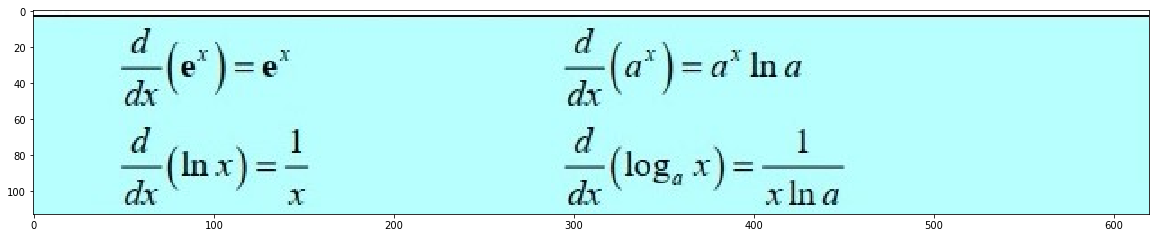

In [7]:
exp=plt.imread('exp.jpg')
plt.figure(figsize=(20,10))
plt.imshow(exp)
plt.show()

# IMPLEMENTING LOSGISTIC REGRESSION

In [19]:
from sklearn.datasets import load_iris
import torch
import torch.nn as nn
import pandas as pd
import random
from torch.utils.data import DataLoader,TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as f

# NOTE

$X \in R^{n \times d}$, weights $W \in R^{d\times q}$, and the bias satisfies $b \in R^{q}$


# loading the dataset

In [20]:
from sklearn.datasets import load_iris
# loading the data
data=load_iris()

In [21]:
data.data[1]

array([4.9, 3. , 1.4, 0.2])

In [22]:
# converting the data into a dataframe
train_data=pd.DataFrame(data.data,columns=data.feature_names)
# converting the target variable into a dataframe
y_data=pd.DataFrame(data.target,columns=['species'])
# concatinating both the target and the input features into a single dataframe
train_data[['species']]=y_data[['species']]
train_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
train_data.shape

(150, 5)

In [24]:
# turning the data into a binary classification problem by dropping the virginica (with value=2) rows from the data
train_data=train_data[train_data['species'] <2]
train_data.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [25]:
train_data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [26]:
input_features=train_data.iloc[:,:-1]
labels=train_data.iloc[:,[-1]]
input_features.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [27]:
labels.head(2)

,species
0,0
1,0


In [28]:
input_features=np.array(input_features)
labels=np.array(labels)
input_features[1:3]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# creating a scaling object

In [29]:
z_scale=StandardScaler()

In [30]:
input_features=z_scale.fit_transform(input_features)

In [31]:
input_features[1:3]

array([[-0.89430898, -0.2078351 , -1.01297765, -1.04211089],
       [-1.20755205,  0.21203379, -1.08231219, -1.04211089]])

 converting the data from numpy arrays to tensors

In [32]:
input_features=torch.FloatTensor(input_features)
labels=torch.FloatTensor(labels)

In [33]:
input_features[8]

tensor([-1.6774, -0.4178, -1.0130, -1.0421])

# Defining Logistic regression

In [34]:
def Logistic_Regression(x,w,b):
    linear=torch.matmul(x,w) + b
    probs=1/(1+torch.exp(-linear))
    return probs

# initializing the model parameters

In [35]:
w=torch.zeros((4,1),requires_grad=True)
b=torch.zeros((1,),requires_grad=True)

# defininf our loss function which is Binary Cross Entropy

In [36]:
def BCE(y_hat,y):
    loss=-(y*torch.log(y_hat) + (1-y)*torch.log(1-y_hat))
    return torch.mean(loss)

Defining stochastic gradient descent as the Optimization Algorithm

In [37]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data=param.data -lr*param.grad/batch_size
        # zero the gradients after updating
        param.grad.data.zero_()

In [38]:
def data_iter(batch_size, features, labels):
    num_examples=len(features)# features.shape[0]
    indices=list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [39]:
lr = .05  # Learning rate
num_epochs = 50  # Number of iterations
batch_size=50
for epoch in range(num_epochs+1):
    for X, y in data_iter(batch_size, input_features, labels):
        y_hat=Logistic_Regression(X, w, b)
        l = BCE(y_hat, y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l(loss) with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = BCE(Logistic_Regression(input_features, w, b), labels) 
    if epoch%5==0:
        print('epoch %d/50, loss %f' % (epoch , train_l.mean()))
    

epoch 0/50, loss 0.691714
epoch 5/50, loss 0.684610
epoch 10/50, loss 0.677614
epoch 15/50, loss 0.670724
epoch 20/50, loss 0.663937
epoch 25/50, loss 0.657252
epoch 30/50, loss 0.650668
epoch 35/50, loss 0.644183
epoch 40/50, loss 0.637796
epoch 45/50, loss 0.631504
epoch 50/50, loss 0.625307


# Concise Implementation of Logistic Regression

# Defining our model

In [73]:
class Logistic_Regression1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(4,1)
        
    def forward(self,x):
        y_pred=f.sigmoid(self.layer1(x))
        return y_pred
        

In [74]:
model=Logistic_Regression1()

In [75]:
model.layer1.weight.shape,model.layer1.bias.shape

(torch.Size([1, 4]), torch.Size([1]))

In [76]:
model.layer1.weight.data=torch.zeros(1,4)
model.layer1.bias.data=torch.zeros(1)
model.layer1.weight.shape,model.layer1.bias.shape

(torch.Size([1, 4]), torch.Size([1]))

# Binary Cross Entropy as the our loss function

In [77]:
loss=nn.BCELoss()

# OPTIMIZER

In [79]:
optimizer=torch.optim.SGD(model.parameters(),lr = 0.05 )

# a function to randomly sample (minbatch) from the dataset

In [80]:
def Load_array(x_data,y_data,batch_size):
    data=TensorDataset(*(x_data,y_data))
    data_loader=DataLoader(dataset=data,batch_size=batch_size,shuffle=True)
    return data_loader

In [81]:
batch_size = 50
data_loader=Load_array(input_features,labels,batch_size=batch_size)

# A TRAINING LOOP

In [82]:
num_epochs = 50
for epoch in range(num_epochs+1): 
    for X,y in data_loader:
        y_hat=model(X)
        l=loss( y_hat,y)
    #if epoch %10==0:
     #   print('epoch{}/{}, loss {}'.format(epoch,num_epochs,l))
        
        optimizer.zero_grad() 
        l.backward() 
        optimizer.step() 
    l_epoch = loss(model(input_features), labels) 
    if epoch %5==0:
        print('epoch %d/50, loss %f'%(epoch,l_epoch))
 

    


C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0/50, loss 0.625312
epoch 5/50, loss 0.404279
epoch 10/50, loss 0.291203
epoch 15/50, loss 0.225721
epoch 20/50, loss 0.183780
epoch 25/50, loss 0.154878
epoch 30/50, loss 0.133832
epoch 35/50, loss 0.117855
epoch 40/50, loss 0.105331
epoch 45/50, loss 0.095253
epoch 50/50, loss 0.086969


# you can define a multilayer logistic regression model as below

In [84]:
class Multilayer_Logistic_Regression(nn.Module):
    def __init__(self,d_in,h_1,d_out):
        super().__init__()
        self.layer1=nn.Linear(d_in,h_1)
        self.layer2=nn.Linear(h,5)
        self.layer3=nn.Linear(5,3)
        self.layer4=nn.Linear(3,d_out)
    def forward(self,x):
        y_hat1=f.sigmoid(self.layer1(x))
        y_hat2=f.sigmoid(self.layer2(y_hat1))
        y_hat3=f.sigmoid(self.layer3(y_hat2))
        y_pred=f.sigmoid(self.layer4(y_hat3))
        return y_pred
        